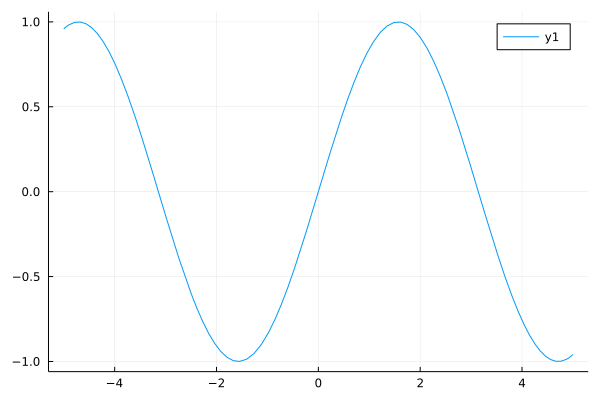

In [49]:
using Distributions
using Roots
using Memoization
using StatsPlots
using StatsFuns: xlogy, xlogx
plot(sin)

In [4]:
x ⪅ y = x < y || x ≈ y

function pval(n, k, θ)
    bin = Binomial(n, θ)
    p0 = pdf(bin, k)
    sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ p0; init = 0.0)
end

function ci(n, k, α = 0.05)
    f(θ) = pval(n, k, θ) - α
    find_zeros(f, 0, 1)
end

ci (generic function with 2 methods)

In [7]:
pval(10, 3, 0.5)

0.3437500000000008

In [8]:
ci(10, 3)

2-element Vector{Float64}:
 0.08726443391415022
 0.6194106589132866

In [9]:
ci(100, 30)

2-element Vector{Float64}:
 0.21419730401454723
 0.3996107372232876

In [10]:
ci(1000, 300)

2-element Vector{Float64}:
 0.27192703796251844
 0.32944662648132883

In [11]:
ci(10000, 3000)

2-element Vector{Float64}:
 0.29104385618418965
 0.30909441516399533

In [109]:
@memoize E(f, dist) = sum(k -> (p = pdf(dist, k); p > 0 ? f(k)*pdf(dist, k) : 0.0), support(dist))

kl(q, p) = - xlogy(q, p) - xlogy(1 - q, 1 - p) + xlogx(q) + xlogx(1 - q)


@memoize function Eloss(δ, n, θ)
    f(k) = 0 < θ < 1 ? (δ(n, k) - θ)^2#== /√(θ*(1 - θ)) ==# : 0.0
    E(f, Binomial(n, θ))
end

@memoize function Eloss(δ, n, θ)
    f(k) =  kl(θ, δ(n, k))
    0 < θ < 1 ? E(f, Binomial(n, θ)) : 0.0
end

function maxEloss(δ, n)
    maximum(θ -> Eloss(δ, n, θ), range(0, 1, 1001))
end

function delta(n, k; a = 0.5, b = a)
    (k + a)/(n + a + b)
end

sim(n, a, b = a) = maxEloss((n, k) -> delta(n, k; a, b), n)

sim (generic function with 2 methods)

In [110]:
kl(0, 0.001)

0.0010005003335835344

In [111]:
Eloss((n, k) -> k/n, 10, 0.4)

Inf

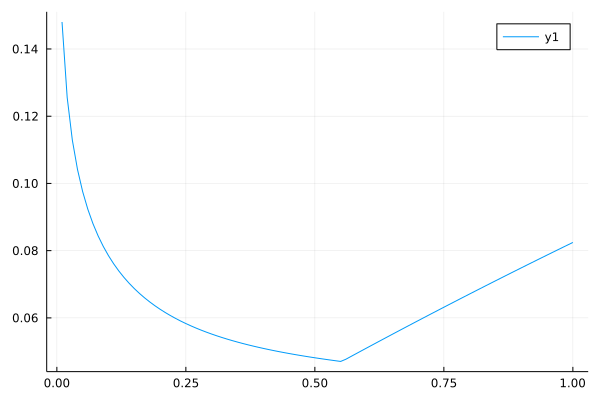

In [116]:
a = 0.01:0.01:1
y = sim.(10, a)
plot(a, y)

In [113]:
maxEloss(delta, 10)

0.04812834057668975

0.09987992391511843

In [22]:
Eloss(delta, 10, 0.001)

45.40904540904541

In [117]:
using SpecialFunctions

In [118]:
gamma(10)

362880.0

In [126]:
exp(logbeta(10, 10^5) + 10log(10^5))

362716.7459045578